<h1> Projekt Analiza danych w pytonie</h1>
<h2>Tomasz Ćwiek</h2>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as ipy
import warnings
warnings.filterwarnings('ignore')#usunięcie ostrzeżeń o wygaszanym wsparciu dla bibliotek

## Wczytanie danych do zmiennej

In [114]:
tablica_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv')
tablica_csv

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## Meta dane

In [115]:
# Wyświetlenie pierwszych kilku wierszy danych
print('Pierwsze wiersze tabeli:\n')
tablica_csv.head()

Pierwsze wiersze tabeli:



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [116]:
# Informacje o danych (liczba wierszy, liczba kolumn, typy danych itp.)
print('Informacje o danych (liczba wierszy, liczba kolumn, typy danych itp.)\n')
tablica_csv.info()

Informacje o danych (liczba wierszy, liczba kolumn, typy danych itp.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  327 non-null    object 
 1   Country/Region  501 non-null    object 
 2   Lat             501 non-null    float64
 3   Long            501 non-null    float64
 4   1/22/20         501 non-null    int64  
 5   1/23/20         501 non-null    int64  
 6   1/24/20         501 non-null    int64  
 7   1/25/20         501 non-null    int64  
 8   1/26/20         501 non-null    int64  
 9   1/27/20         501 non-null    int64  
 10  1/28/20         501 non-null    int64  
 11  1/29/20         501 non-null    int64  
 12  1/30/20         501 non-null    int64  
 13  1/31/20         501 non-null    int64  
 14  2/1/20          501 non-null    int64  
 15  2/2/20          501 non-null    int64  
 16  2/3/20   

In [117]:
# Podstawowe statystyki opisowe dla danych
print('Podstawowe statystyki:\n')
tablica_csv.describe()

Podstawowe statystyki:



,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,309.000000
mean,30.285772,-33.097762,1.107784,1.303393,1.878244,2.862275,4.227545,5.842315,11.133733,12.307385,...,311.564870,334.223553,362.329341,393.497006,428.962076,484.447106,543.245509,607.832335,670.568862,1087.391586
std,19.870544,80.661210,19.886889,19.969170,24.875593,34.637942,48.422475,65.253024,159.914427,160.961540,...,3263.324717,3332.995975,3415.516311,3511.636870,3642.374951,3832.930820,4064.084657,4337.179809,4594.278660,5814.685942
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,76.000000
75%,42.165700,21.824300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,28.000000,37.000000,50.000000,58.000000,76.000000,89.000000,117.000000,135.000000,326.000000
max,72.000000,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


## Ilość potwierdzonych przypadków ogółem na linii czasu

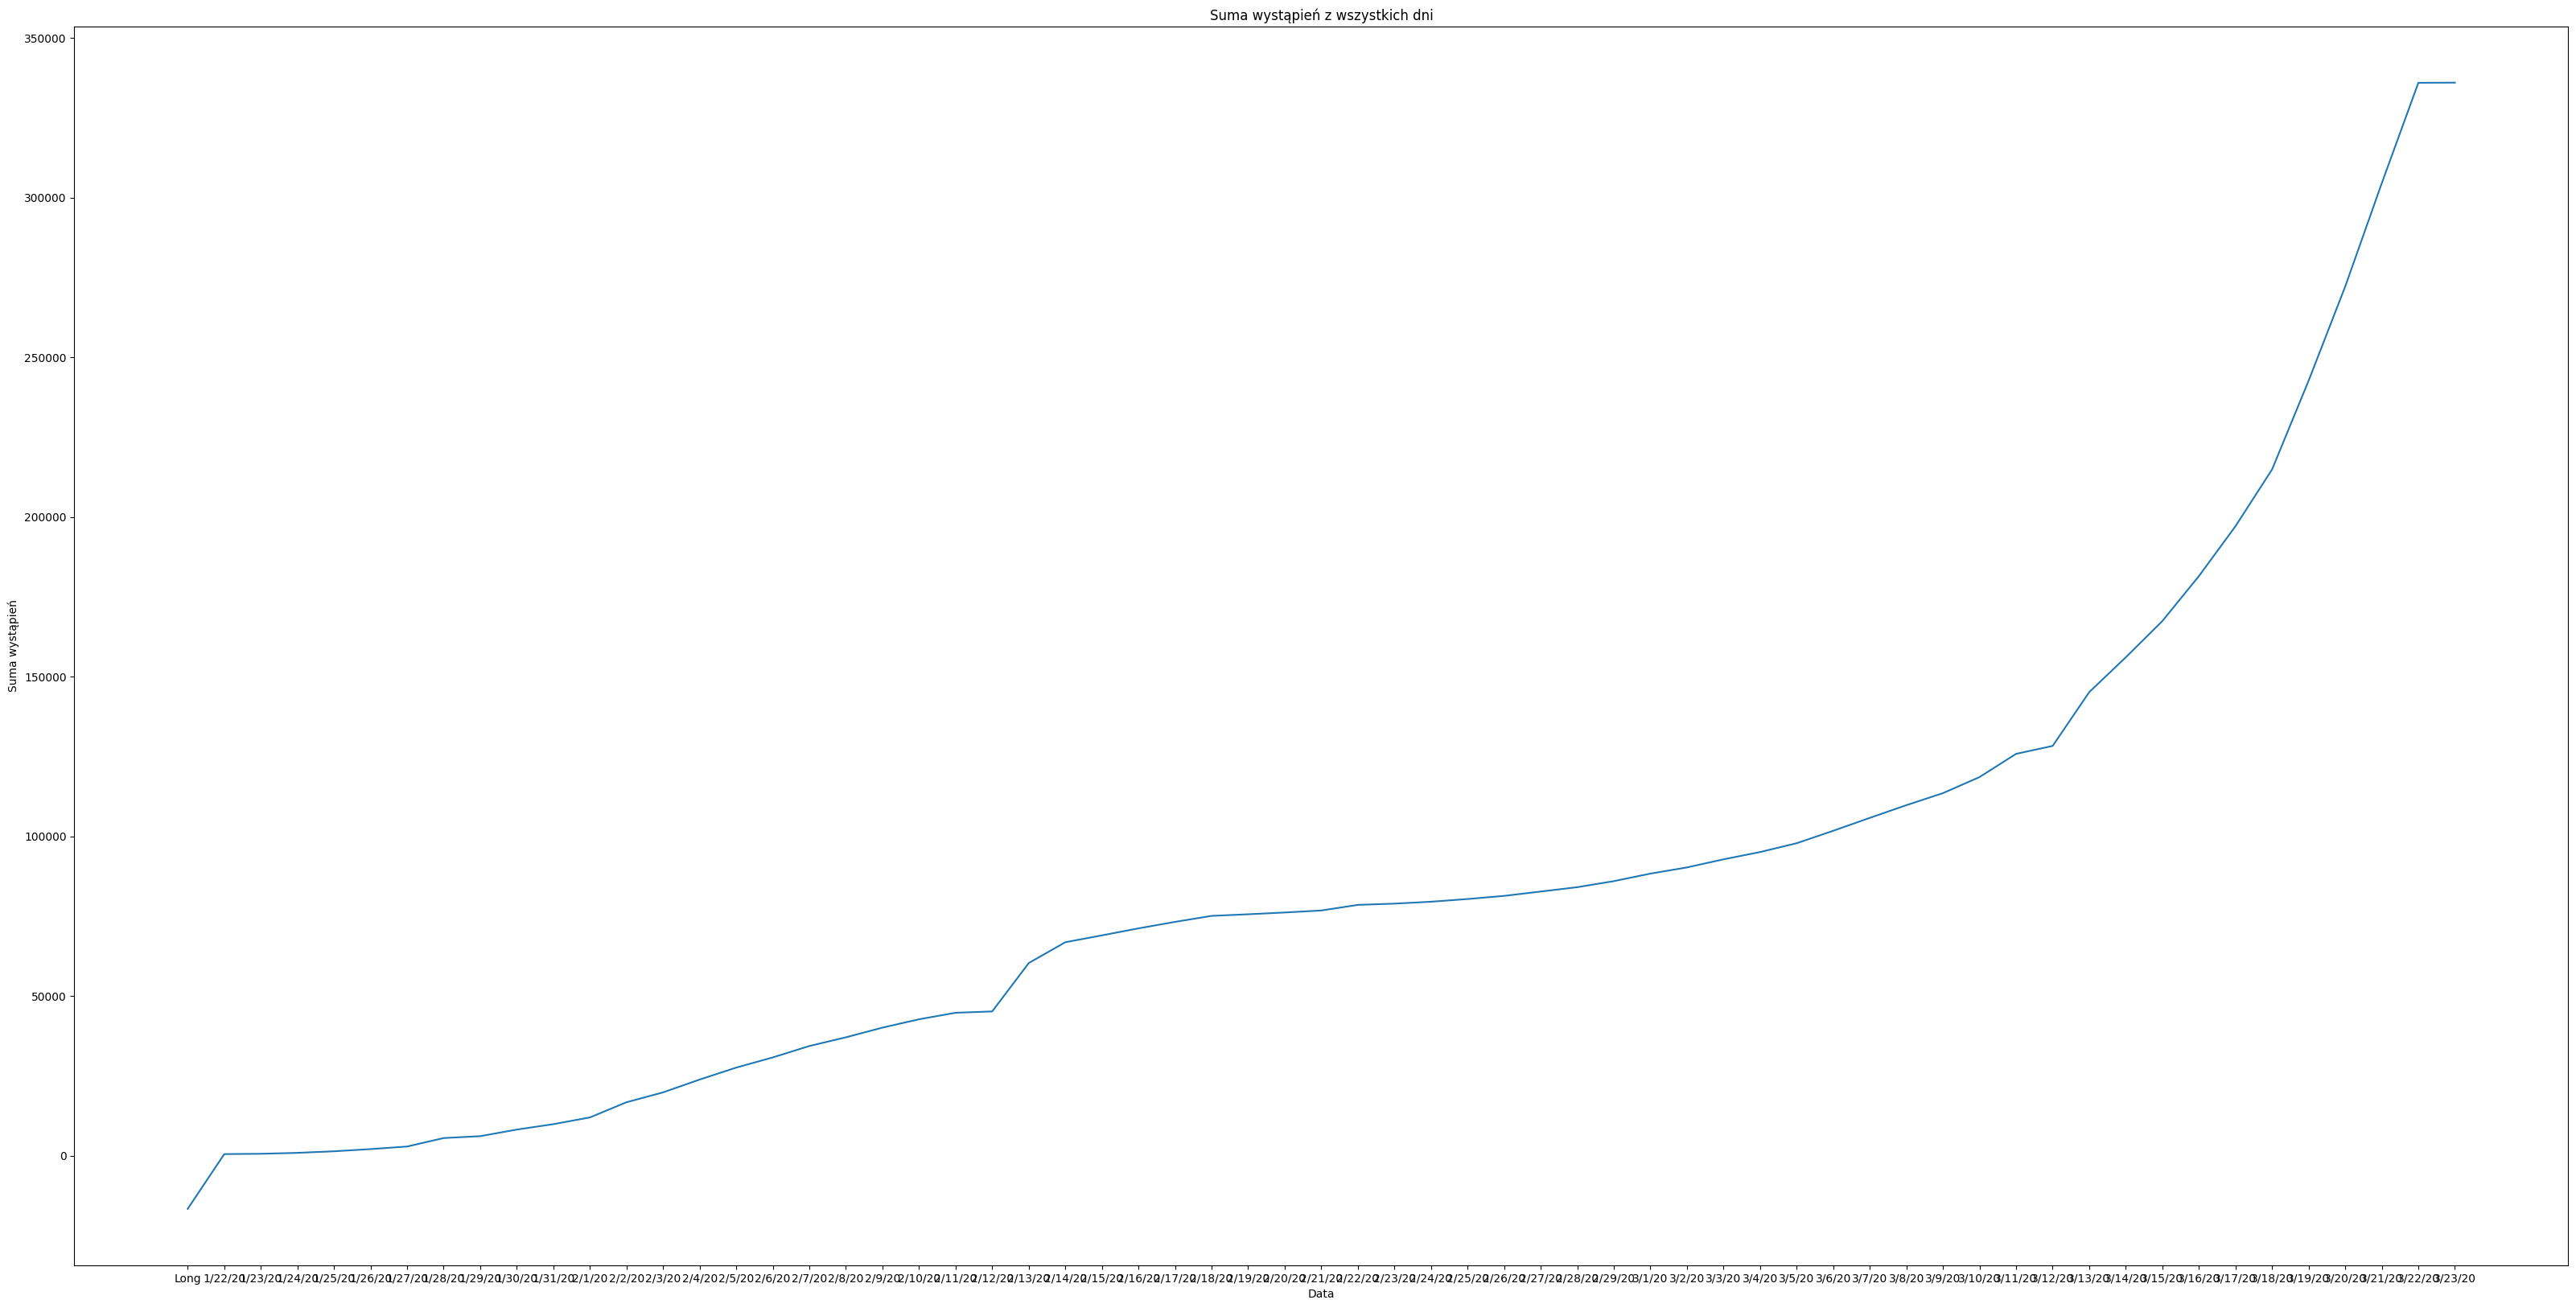

In [118]:
suma = tablica_csv.sum(axis=0)
suma = suma[2:]
plt.figure(figsize=(40,20))
plt.plot(suma.index, suma.values)
# Konfiguracja etykiet osi
plt.xlabel('Data')
plt.ylabel('Suma wystąpień')

# Konfiguracja tytułu wykresu
plt.title('Suma wystąpień z wszystkich dni')

# Wyświetlenie wykresu
plt.show()

## Liczba potwierdzonych przypadków COVID-19 w czasie

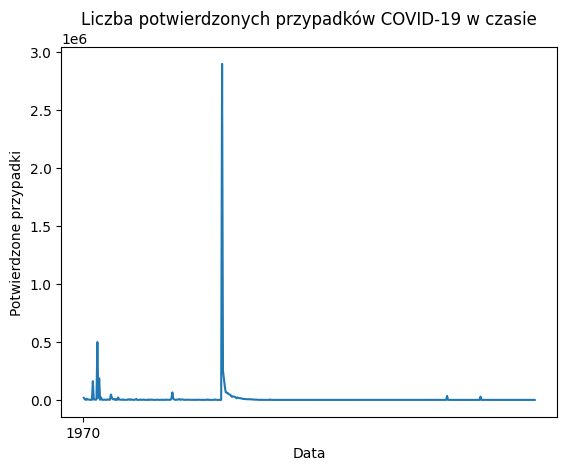

In [119]:
# Usunięcie kolumn nieistotnych dla analizy czasowej
dane_do_analizy = tablica_csv.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

# Przekształcenie danych do postaci szeregów czasowych
dane_do_analizy = dane_do_analizy.transpose()
dane_do_analizy.columns = dane_do_analizy.iloc[0]
dane_do_analizy = data[1:]
dane_do_analizy.index = pd.to_datetime(dane_do_analizy.index)

# Wykres potwierdzonych przypadków w czasie
plt.plot(dane_do_analizy.index, dane_do_analizy.sum(axis=1))
plt.xlabel('Data')
plt.ylabel('Potwierdzone przypadki')
plt.title('Liczba potwierdzonych przypadków COVID-19 w czasie')
plt.show()




### Analiza najnowszych danych:

In [120]:
# Suma potwierdzonych przypadków dla każdego kraju/regionu
calkowita_liczba_wystapien_na_kraj = tablica_csv.groupby('Country/Region').sum().iloc[:, 3:].sum(axis=1)

# Kraje/regiony z największą liczbą potwierdzonych przypadków
top_kraje = calkowita_liczba_wystapien_na_kraj.nlargest(10)
print(top_kraje)

# Suma potwierdzonych przypadków na świecie
globalna_liczba_przypadkow = calkowita_liczba_wystapien_na_kraj.sum()
print("Całkowita liczba potwierdzonych przypadków na świecie:", globalna_liczba_przypadkow)


Country/Region
China             3530621.0
Italy              497959.0
Iran               252770.0
Spain              186200.0
Korea, South       181698.0
Germany            160974.0
US                 159038.0
France             118509.0
Switzerland         46413.0
United Kingdom      35365.0
dtype: float64
Całkowita liczba potwierdzonych przypadków na świecie: 5531786.0


### Wykres słupkowy z największymi przypadkami w różnych krajach

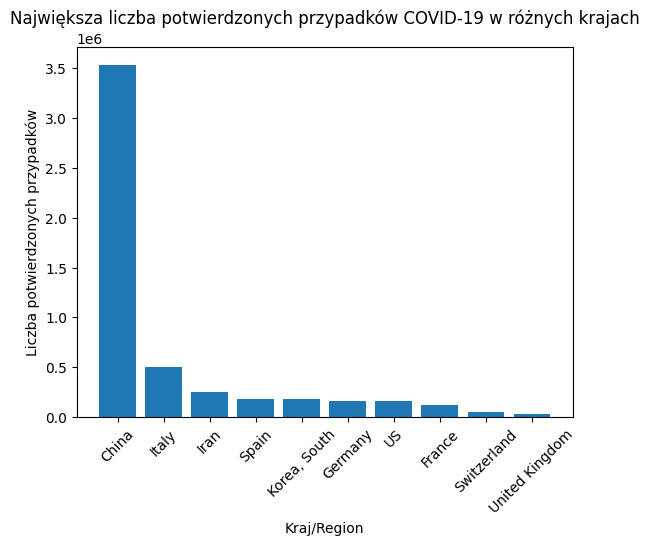

In [121]:
# Wykres słupkowy z największymi przypadkami w różnych krajach
plt.bar(top_kraje.index, top_kraje.values)
plt.xlabel('Kraj/Region')
plt.ylabel('Liczba potwierdzonych przypadków')
plt.title('Największa liczba potwierdzonych przypadków COVID-19 w różnych krajach')
plt.xticks(rotation=45)
plt.show()

### Wykresy porównawcze dla różnych krajów/regionów

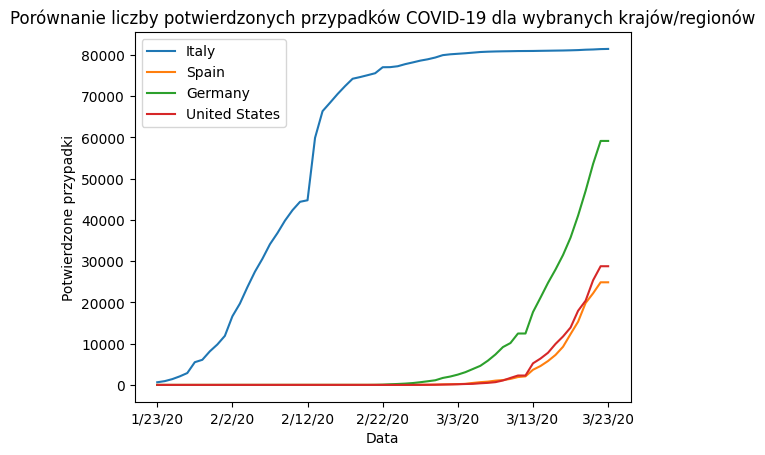

In [122]:
wybrane_kraje = ['Italy', 'Spain', 'Germany', 'United States', 'China']

# Filtracja danych dla wybranych krajów/regionów
wybrane_dane = tablica_csv[tablica_csv['Country/Region'].isin(wybrane_kraje)].groupby('Country/Region').sum().iloc[:, 3:]

# Wykresy porównawcze dla wybranych krajów/regionów
wybrane_dane.transpose().plot()
plt.xlabel('Data')
plt.ylabel('Potwierdzone przypadki')
plt.title('Porównanie liczby potwierdzonych przypadków COVID-19 dla wybranych krajów/regionów')
plt.legend(wybrane_kraje)
plt.show()

### Analiza przyrostu dziennego

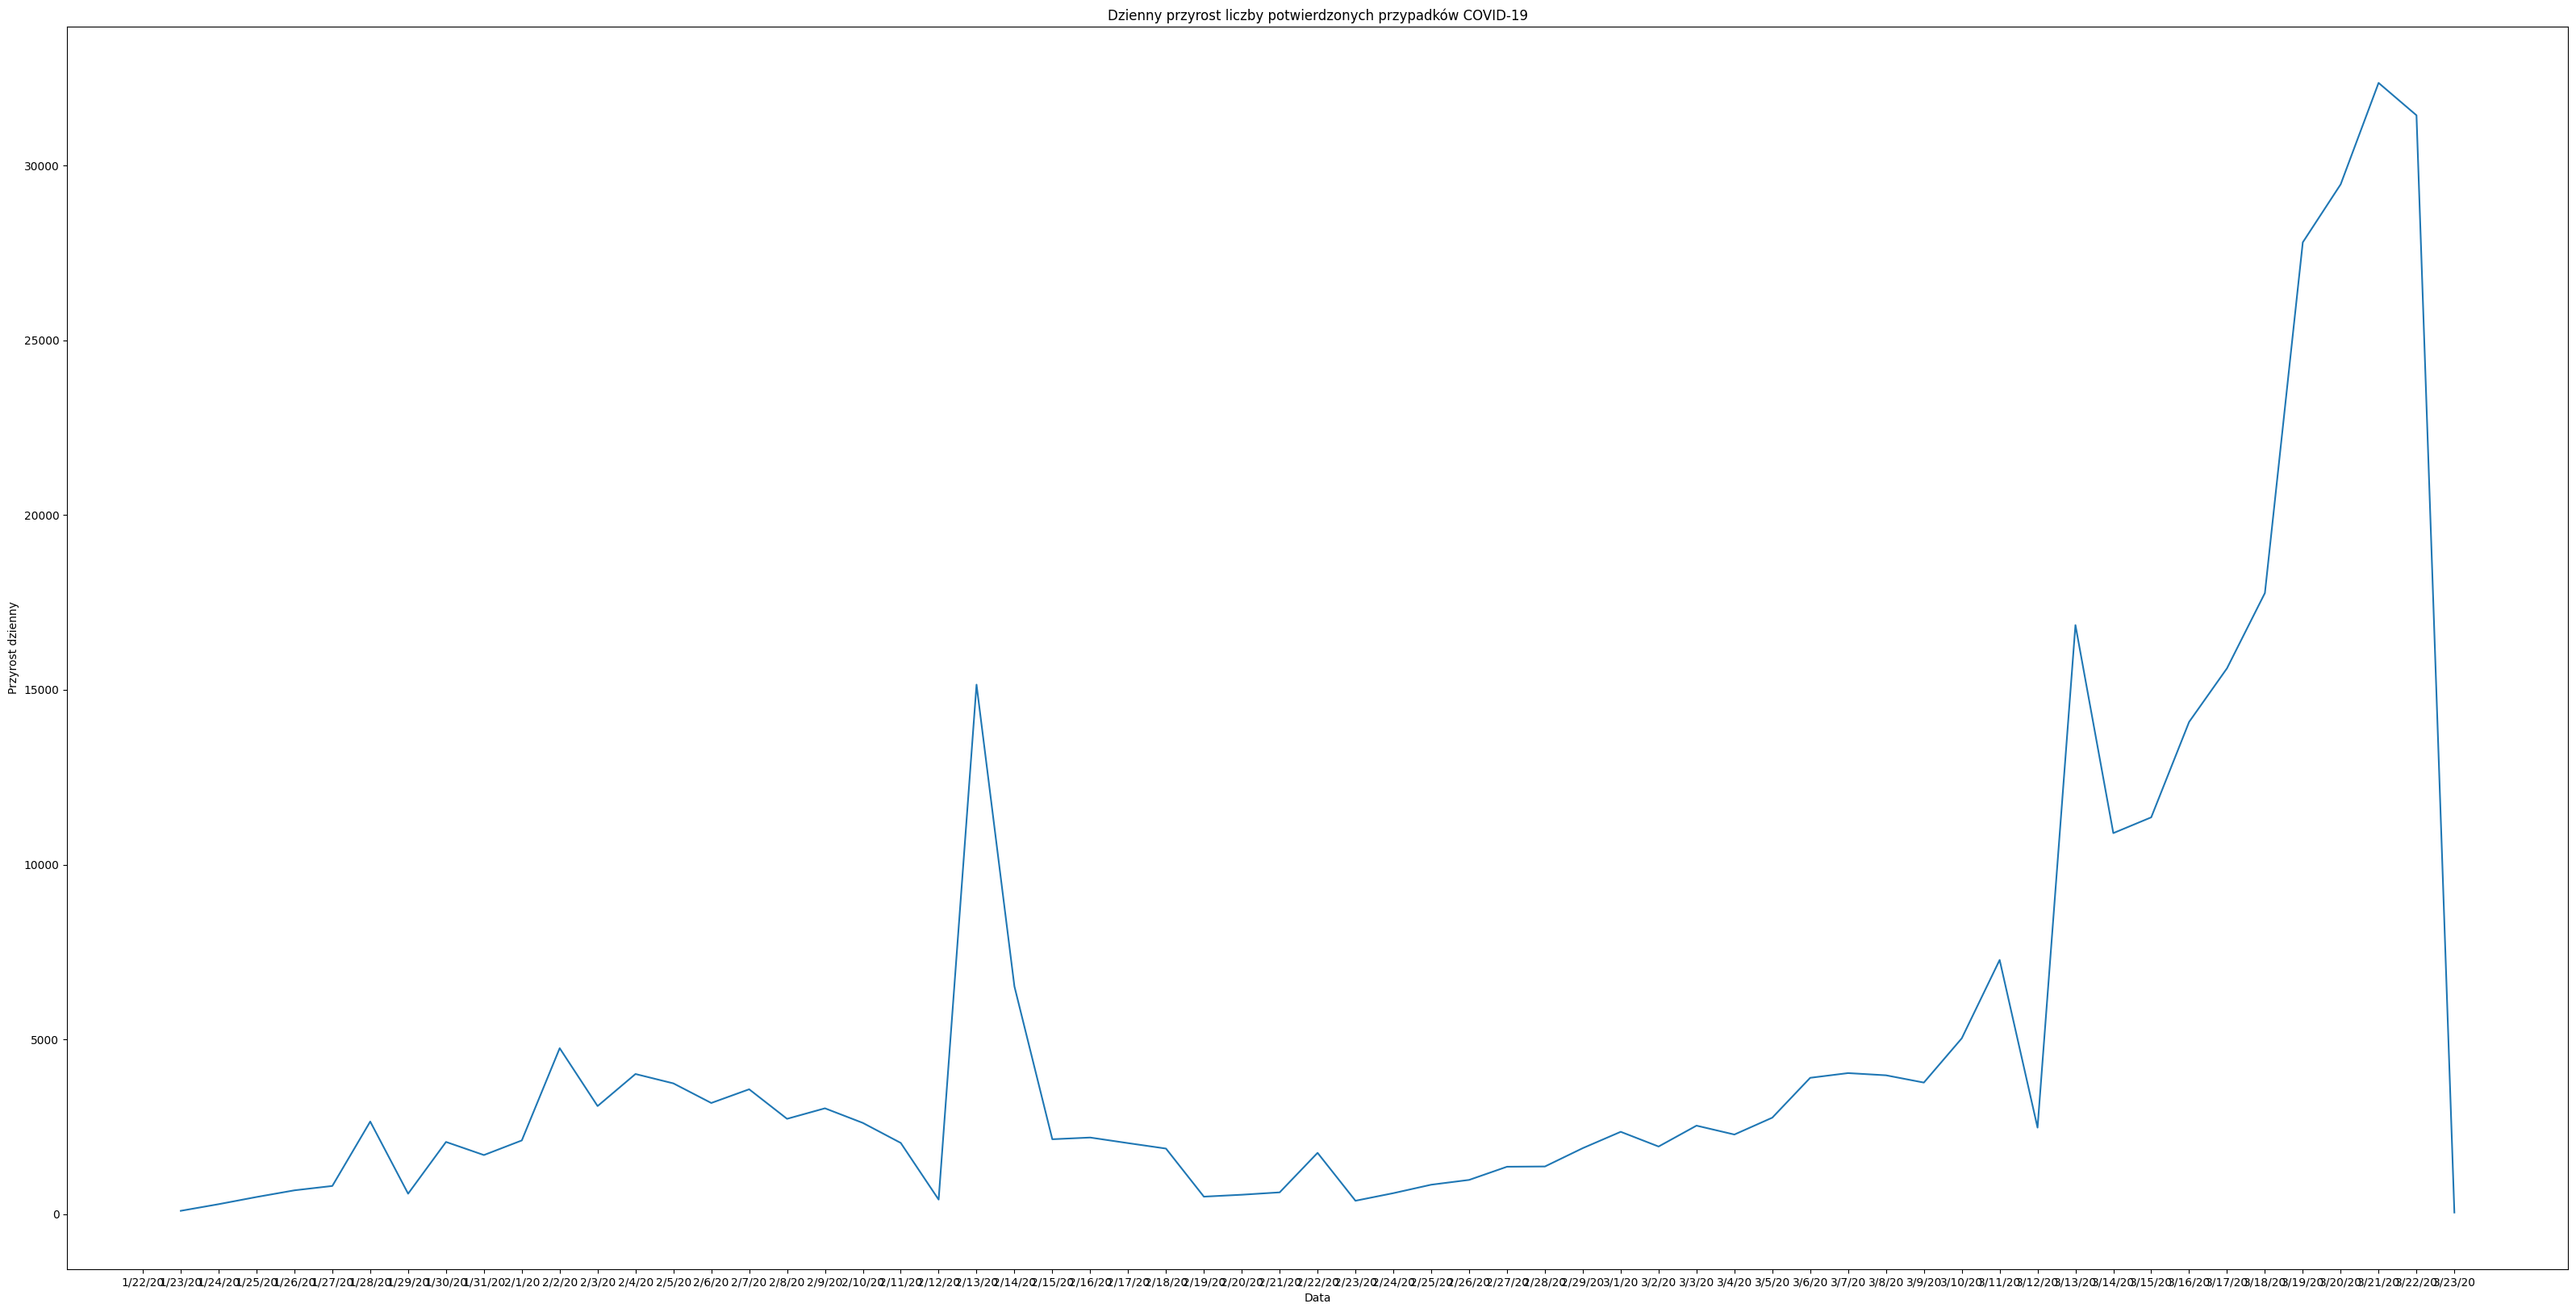

In [123]:
# Suma potwierdzonych przypadków dla każdego dnia
dzienne_przypadki = tablica_csv.iloc[:, 4:].sum(axis=0)

# Przyrost dzienny
przyrost_dzienny = dzienne_przypadki.diff()

# Wykres przyrostu dziennego
plt.figure(figsize=(40,20))
plt.plot(przyrost_dzienny.index, przyrost_dzienny.values)
plt.xlabel('Data')
plt.ylabel('Przyrost dzienny')
plt.title('Dzienny przyrost liczby potwierdzonych przypadków COVID-19')
plt.show()

### Średnia liczba przypadków w poszczególnych krajach:

In [124]:
# Obliczenie średniej liczby przypadków dla każdego kraju/regionu
tablica_csv.groupby('Country/Region').mean().iloc[:, 4:]

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,42.0,51.0,55.0,59.0,64.0,70.0,76.0,89.0,89.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,48.0,54.0,60.0,74.0,87.0,90.0,139.0,201.0,201.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,39.0,39.0,53.0,75.0,88.0,113.0,113.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,10.0,15.0,23.0,33.0,43.0,43.0,43.0
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,10.0,17.0,33.0,36.0,42.0,42.0,70.0,70.0,70.0
Vietnam,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,...,53.0,56.0,61.0,66.0,75.0,85.0,91.0,94.0,113.0,113.0


### Maksymalna liczba przypadków w poszczególnych krajach na przestrzeni czasu:

In [125]:
# Filtracja danych dla wybranych krajów/regionów
wybrane_dane = tablica_csv[tablica_csv['Country/Region'].isin(wybrane_kraje)]

# Znalezienie maksymalnej liczby przypadków dla każdego kraju/regionu
wybrane_dane.groupby('Country/Region').max().iloc[:, 4:]

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,444,549,761,1058,1423,3554,3554,4903,5806,7153,...,67790,67794,67798,67799,67800,67800,67800,67800,67800,67800.0
Germany,0,0,0,0,1,4,4,4,5,8,...,4585,5795,7272,9257,12327,15320,19848,22213,24873,24873.0
Italy,0,0,0,0,0,0,0,0,2,2,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,59138.0
Spain,0,0,0,0,0,0,0,0,0,1,...,6391,7798,9942,11748,13910,17963,20410,25374,28768,28768.0


### Suma przypadków w poszczególnych prowincjach/dystryktach w danym USA:

In [126]:
# Suma przypadków dla każdej prowincji/dystryktu w danym kraju/regionie
data[data['Country/Region'] == 'US'].groupby('Province/State').sum().iloc[:, 4:]

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Province/State,,,,,,,,,,,,,,,,,,,,,
"Adams, IN",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Alabama,0,0,0,0,0,0,0,0,0,0,...,6,12,29,39,46,78,83,131,138,138.0
"Alachua, FL",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
"Alameda County, CA",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Alaska,0,0,0,0,0,0,0,0,0,0,...,1,1,1,3,6,9,12,15,21,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Williamson County, TN",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Wisconsin,0,0,0,0,0,0,0,0,0,0,...,27,32,47,72,92,159,207,282,381,381.0
"Worcester, MA",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### Analiza średniej liczby przypadków na dni tygodnia

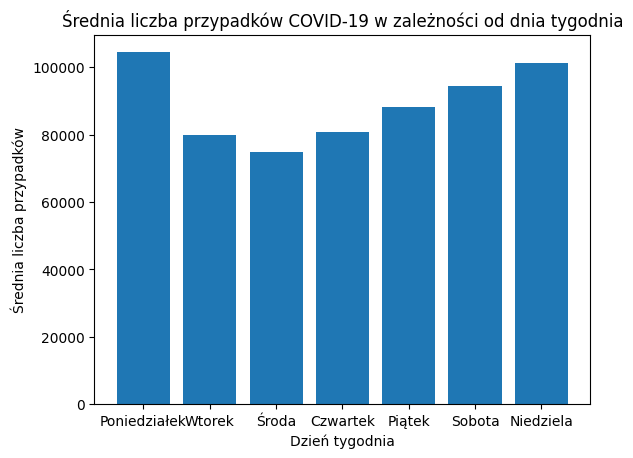

In [127]:
# Przekształcenie danych do postaci szeregów czasowych
dane = tablica_csv.iloc[:, 4:].sum(axis=0)
dane.index = pd.to_datetime(dane.index)

# Grupowanie po dniach tygodnia i obliczenie średniej liczby przypadków
srednie_dane_na_tydzien = dane.groupby(dane.index.weekday).mean()

# Wykres średniej liczby przypadków na dni tygodnia
etykieta_dnia = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
plt.bar(etykieta_dnia, srednie_dane_na_tydzien)
plt.xlabel('Dzień tygodnia')
plt.ylabel('Średnia liczba przypadków')
plt.title('Średnia liczba przypadków COVID-19 w zależności od dnia tygodnia')
plt.show()